In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mesostat.metric.metric import MetricCalculator

from models import two_node_system

In [27]:
def acc(mat, nTest):
    return np.sum(np.diag(mat)).astype(float) / nTest / mat.shape[0]

def acc_te_lag_corrected(mat, nTest):
    diagSum = np.sum(mat.diagonal(offset=1)) + mat[-1][-1]
    return diagSum.astype(float) / nTest / mat.shape[0]

# 1. SELF-TEST 1: Can CrossCorr and CrossMI detect lag of noisy dynamical system

In [3]:
mc = MetricCalculator(serial=True, verbose=False)

Doing method crosscorr
Accuracy 1.0


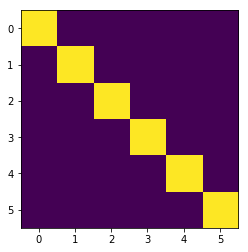

Doing method cross_MI
Accuracy 1.0


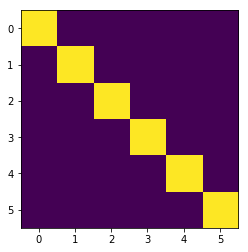

In [4]:
nTest = 20
maxLag = 5
for method in ['crosscorr', 'cross_MI']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(0, maxLag+1):
        for iTest in range(nTest):    
            data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.1)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=None, sweepSettings={'lag' : [0,1,2,3,4,5]})
            if method=='crosscorr':
                rez = np.abs(rez)
            
            lagEst = np.argmax(rez[:, 0, 1])
            rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat, nTest))
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

Doing method BivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redire

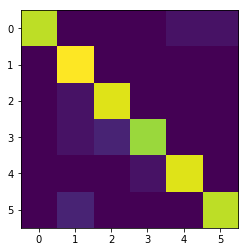

Doing method MultivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Red

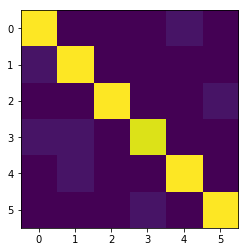

In [5]:
nTest = 20
maxLag = 5

idtxlParam = {
    'dim_order'       : 'ps',
    'cmi_estimator'   : 'JidtGaussianCMI',
    'max_lag_sources' : maxLag,
    'min_lag_sources' : 0,
    'parallelTrg' : False
}

for method in ['BivariateTE', 'MultivariateTE']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(0, maxLag+1):
        for iTest in range(nTest):
            data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.1)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=idtxlParam)
            lagEst = int(rez[1, 0, 1])
            rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat, nTest))
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

# 2. Test performance of CrossCorr/MI for convolved dynamical system

**Conclusions-CC/CMI**:
* Ideally exact recovery possible
* 10% of added observation noise can completely destroy FC. For 1% works good. Expected because for convolved data the important signal is small compared to the absolute value of the bulk convolved signal.

**Conclusions-BTE/MTE**
* Acquires extra lag due to convolution-needs correction
* Added noise sensitivity even worse than CC/CMI. 5% already enough to completely destroy. 1% still good

Doing method crosscorr
Accuracy 1.0


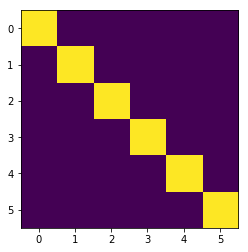

Doing method cross_MI
Accuracy 0.8166666666666668


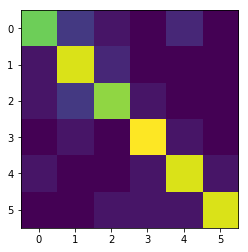

In [8]:
nTest = 20
maxLag = 5
for method in ['crosscorr', 'cross_MI']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(0, maxLag+1):
        for iTest in range(nTest):    
            data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.05, convDT=0.05, convTau=0.5)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=None, sweepSettings={'lag' : [0,1,2,3,4,5]})
            if method=='crosscorr':
                rez = np.abs(rez)
                
            lagEst = np.argmax(rez[:, 0, 1])
            rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat, nTest))
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

Doing method BivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redire

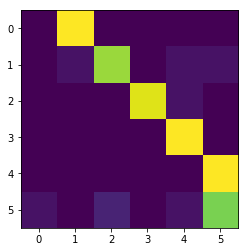

Doing method MultivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Red

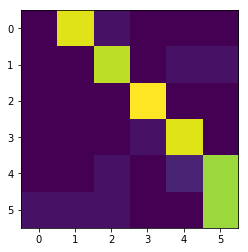

In [28]:
nTest = 20
maxLag = 5

idtxlParam = {
    'dim_order'       : 'ps',
    'cmi_estimator'   : 'JidtGaussianCMI',
    'max_lag_sources' : maxLag,
    'min_lag_sources' : 0,
    'parallelTrg' : False
}

for method in ['BivariateTE', 'MultivariateTE']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(0, maxLag+1):
        for iTest in range(nTest):
            data = two_node_system(200, [lagTrue], [0.5], noiseFrac=0.01, convDT=0.05, convTau=0.5)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=idtxlParam)            
            if not np.isnan(rez[1, 0, 1]):
                lagEst = int(rez[1, 0, 1])
                rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat, nTest))
    print("Accuracy-corrected", acc_te_lag_corrected(rezMat, nTest))
    
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

# 3. Higher order Dynamical Systems

Plan:
* There are two links x->y: one at Dt = 0, other at Dt = n
* We sweep all lags from 1 to 5, and see fidelity of lag n

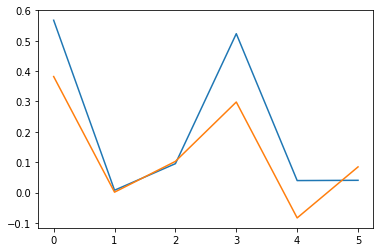

In [23]:
# Example (tune that both FC's have same strength)
data = two_node_system(200, [0, 3], [0.33, 0.33], noiseFrac=0.01)

mc.set_data(np.array(data), 'ps')
rezCC = mc.metric3D('crosscorr', '', metricSettings=None, sweepSettings={'lag' : [0,1,2,3,4,5]})
rezCMI = mc.metric3D('cross_MI', '', metricSettings=None, sweepSettings={'lag' : [0,1,2,3,4,5]})

plt.figure()
plt.plot(np.abs(rezCC[:, 0, 1]))
plt.plot(rezCMI[:, 0, 1])
plt.show()

Doing method crosscorr
Accuracy 0.75


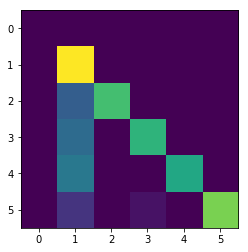

Doing method cross_MI
Accuracy 0.51


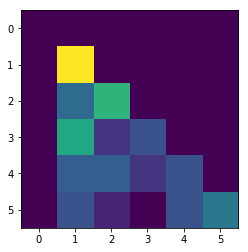

In [25]:
nTest = 20
maxLag = 5
for method in ['crosscorr', 'cross_MI']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(1, maxLag+1):
        for iTest in range(nTest):
            data = two_node_system(200, [0, lagTrue], [0.33, 0.33], noiseFrac=0.01, convDT=0.05, convTau=0.5)
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=None, sweepSettings={'lag' : [1,2,3,4,5]})
            if method=='crosscorr':
                rez = np.abs(rez)
            
            lagEst = np.argmax(rez[:, 0, 1]) + 1
            rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat[1:, 1:], nTest))
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

Doing method BivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redire

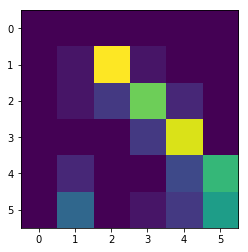

Doing method MultivariateTE
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Redirecting STDOUT to log_14574.txt
Resumed STDOUT
Red

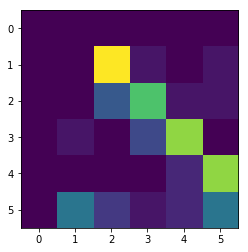

In [26]:
nTest = 20
maxLag = 5

idtxlParam = {
    'dim_order'       : 'ps',
    'cmi_estimator'   : 'JidtGaussianCMI',
    'max_lag_sources' : maxLag,
    'min_lag_sources' : 1,
    'parallelTrg' : False
}

for method in ['BivariateTE', 'MultivariateTE']:
    print('Doing method', method)
    rezMat = np.zeros((maxLag+1, maxLag+1))
    for lagTrue in range(1, maxLag+1):
        for iTest in range(nTest):
            data = two_node_system(200, [0, lagTrue], [0.33, 0.33], noiseFrac=0.01, convDT=0.05, convTau=0.5)
            
            mc.set_data(data, 'ps')
            rez = mc.metric3D(method, '', metricSettings=idtxlParam)
            if not np.isnan(rez[1, 0, 1]):
                lagEst = int(rez[1, 0, 1])
                rezMat[lagTrue][lagEst] += 1
    
    print("Accuracy", acc(rezMat[1:,1:], nTest))
    print("Accuracy-corrected", acc_te_lag_corrected(rezMat[1:,1:], nTest))
    plt.figure()
    plt.imshow(rezMat)
    plt.show()

TODO:
* Barplots of false positives for methods
* Scatter-plot total-degree/in-degree/out-degree vs SNR & total-TE vs SNR (SNR by session, pool mice 12 vs 48)